# Preprocessing Data for Sentiment Analysis

In [4]:
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import twitter_samples
import random

In [5]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/shielasandoval/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

In [6]:
twitter_samples.fileids()

['negative_tweets.json', 'positive_tweets.json', 'tweets.20150430-223406.json']

In [7]:
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

In [10]:
print(len(positive_tweets), len(negative_tweets))

5000 5000


In [11]:
print(type(positive_tweets), type(negative_tweets))

<class 'list'> <class 'list'>


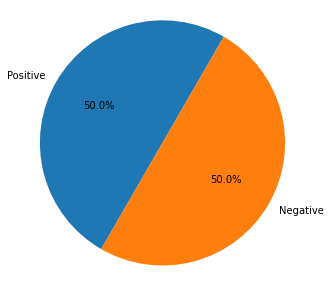

In [18]:
# let's visualise the datasets!

figure = plt.figure(figsize=(5,5))
labels = ['Positive', 'Negative']
sizes = [len(positive_tweets), len(negative_tweets)]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=60)
plt.axis('equal')
plt.show()

In [23]:
# taking a peek at the tweets

print('Positive sample: ', positive_tweets[random.randint(0, len(positive_tweets))])
print('Negative sample: ', negative_tweets[random.randint(0, len(negative_tweets))])

Positive sample:  @CocoaBrownTan @FuschiaEffect I'm glowing this morning! Yayyyy :))) happy Friday! Xx
Negative sample:  @ReddBlock1 @MadridGamesWeek Too far away :(


## Preprocess only one sample

In [33]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shielasandoval/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
import re
import string

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

In [63]:
tweet = positive_tweets[random.randint(0, len(positive_tweets))]
tweet

'Check out my ride in #CSRRacing for Android! Try it for FREE!\nhttp://t.co/XVIgThe1j3 a new one :) http://t.co/fLbjhBYcEY'

### Remove hyperlinks and other styling

In [64]:
print(tweet)

Check out my ride in #CSRRacing for Android! Try it for FREE!
http://t.co/XVIgThe1j3 a new one :) http://t.co/fLbjhBYcEY


In [66]:
# Old retweets have the text "RT"
tweet2 = re.sub(r'^RT[\s]+', '', tweet)
print(tweet2)

Check out my ride in #CSRRacing for Android! Try it for FREE!
http://t.co/XVIgThe1j3 a new one :) http://t.co/fLbjhBYcEY


In [68]:
# Remove hyperlinks
tweet2 = re.sub(r'https?://[^\s\n\r]+', '', tweet2)
print(tweet2)

Check out my ride in #CSRRacing for Android! Try it for FREE!
 a new one :) 


In [69]:
# Remove hashtags
tweet2 = re.sub(r'#', '', tweet2)
print(tweet2)

Check out my ride in CSRRacing for Android! Try it for FREE!
 a new one :) 


### Tokenize

In [70]:
tokenizer = TweetTokenizer(preserve_case=False,
                           strip_handles=True,
                           reduce_len=True)

tweet_tokens = tokenizer.tokenize(tweet2)
print('Tokenized string:')
print(tweet_tokens)

Tokenized string:
['check', 'out', 'my', 'ride', 'in', 'csrracing', 'for', 'android', '!', 'try', 'it', 'for', 'free', '!', 'a', 'new', 'one', ':)']


### Remove stopwords and punctuation

In [71]:
stopwords_english = stopwords.words('english')
print('Stopwords: ', stopwords_english)

Stopwords:  ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

In [72]:
print('Punctuation: ', string.punctuation)

Punctuation:  !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [75]:
cleaned_tokens = []

for token in tweet_tokens:
    if (token not in stopwords_english and
        token not in string.punctuation):
            cleaned_tokens.append(token)
            
print('Removed stopwords and punctuation:')
print(cleaned_tokens)

Removed stopwords and punctuation:
['check', 'ride', 'csrracing', 'android', 'try', 'free', 'new', 'one', ':)']


### Stemming

In [79]:
stemmer = PorterStemmer()

stem_tokens = [stemmer.stem(t) for t in cleaned_tokens]
print('Stemmed tokens:')
print(stem_tokens)

Stemmed tokens:
['check', 'ride', 'csrrace', 'android', 'tri', 'free', 'new', 'one', ':)']


## Building and Visualising Word Frequencies

In [80]:
import numpy as np

In [82]:
#util function
def process_tweet(tweet):
    """Process tweet function.
    Input:
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet

    """
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks    
    tweet = re.sub(r'https?://[^\s\n\r]+', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean

In [83]:
def build_freqs(tweets, ys):
    """This counts the number of times each word in each tweet is associated to
       positive (1) or negative (0) sentiment"""
    ys_list = np.squeeze(ys).tolist()
    freqs = {}
    
    for y, tweet in zip(ys_list, tweets):
        for token in process_tweet(tweet):
            pair = (token, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1
                
    return freqs

In [84]:
labels = np.append(np.ones(len(positive_tweets)), np.zeros(len(negative_tweets)))

In [86]:
len(labels)

10000

In [88]:
tweets = positive_tweets + negative_tweets
freqs = build_freqs(tweets, labels)

In [89]:
freqs

{('followfriday', 1.0): 25,
 ('top', 1.0): 32,
 ('engag', 1.0): 7,
 ('member', 1.0): 16,
 ('commun', 1.0): 33,
 ('week', 1.0): 83,
 (':)', 1.0): 3691,
 ('hey', 1.0): 77,
 ('jame', 1.0): 7,
 ('odd', 1.0): 2,
 (':/', 1.0): 5,
 ('pleas', 1.0): 99,
 ('call', 1.0): 37,
 ('contact', 1.0): 7,
 ('centr', 1.0): 2,
 ('02392441234', 1.0): 1,
 ('abl', 1.0): 8,
 ('assist', 1.0): 1,
 ('mani', 1.0): 33,
 ('thank', 1.0): 643,
 ('listen', 1.0): 17,
 ('last', 1.0): 47,
 ('night', 1.0): 68,
 ('bleed', 1.0): 2,
 ('amaz', 1.0): 51,
 ('track', 1.0): 5,
 ('scotland', 1.0): 2,
 ('congrat', 1.0): 21,
 ('yeaaah', 1.0): 1,
 ('yipppi', 1.0): 1,
 ('accnt', 1.0): 2,
 ('verifi', 1.0): 2,
 ('rqst', 1.0): 1,
 ('succeed', 1.0): 1,
 ('got', 1.0): 69,
 ('blue', 1.0): 9,
 ('tick', 1.0): 1,
 ('mark', 1.0): 1,
 ('fb', 1.0): 6,
 ('profil', 1.0): 2,
 ('15', 1.0): 5,
 ('day', 1.0): 246,
 ('one', 1.0): 131,
 ('irresist', 1.0): 2,
 ('flipkartfashionfriday', 1.0): 17,
 ('like', 1.0): 233,
 ('keep', 1.0): 68,
 ('love', 1.0): 401,


In [90]:
# table of word counts

In [92]:
keys = ['pleas', 'thank', 'track', 'good', 'wrong', 'sad', 'mad', 'juici', 'succeed',
        ':)', ':-)', '😒', '😬', '🚂', '♥', '😄',
        'unfollow', 'done', 'fluffi', 'fat', 'probabl']

In [93]:
# data representation will be [word, positive_freq, negative_freq]
data = []

for word in keys:
    pos = 0
    neg = 0
    
    if (word, 1) in freqs:
        pos = freqs[(word, 1)]
        
    if (word, 0) in freqs:
        neg = freqs[(word, 0)]
        
    data.append([word, pos, neg])
    
data

[['pleas', 99, 275],
 ['thank', 643, 107],
 ['track', 5, 3],
 ['good', 238, 101],
 ['wrong', 10, 33],
 ['sad', 5, 123],
 ['mad', 4, 11],
 ['juici', 3, 0],
 ['succeed', 1, 0],
 ['❤', 29, 21],
 [':)', 3691, 2],
 [':-)', 701, 0],
 ['😒', 2, 3],
 ['😬', 0, 2],
 ['🚂', 1, 0],
 ['♥', 19, 22],
 ['😄', 5, 1],
 ['unfollow', 63, 11],
 ['done', 54, 24],
 ['fluffi', 1, 2],
 ['fat', 1, 4],
 ['probabl', 10, 8]]

/Users/shielasandoval/MySite/posts/nlp/venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128556 (\N{GRIMACING FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/shielasandoval/MySite/posts/nlp/venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128642 (\N{STEAM LOCOMOTIVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


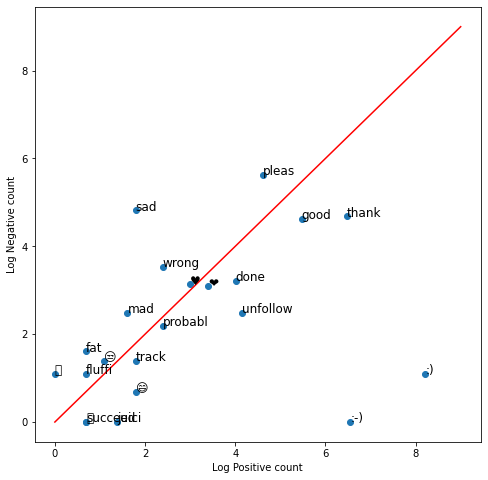

In [94]:
fig, ax = plt.subplots(figsize = (8, 8))

# convert positive raw counts to logarithmic scale. we add 1 to avoid log(0)
x = np.log([x[1] + 1 for x in data])  

# do the same for the negative counts
y = np.log([x[2] + 1 for x in data]) 

# Plot a dot for each pair of words
ax.scatter(x, y)  

# assign axis labels
plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

# Add the word as the label at the same position as you added the points just before
for i in range(0, len(data)):
    ax.annotate(data[i][0], (x[i], y[i]), fontsize=12)

ax.plot([0, 9], [0, 9], color = 'red') # Plot the red line that divides the 2 areas.
plt.show()